# Cell type deconvolution with STitch3D

We first used STitch3D to estimate the cell type proportions.

In [ ]:
import sys
sys.path.append(r'/import/home/share/zw/pql/STitch3D/')
import STitch3D

import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import scipy.io
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
DATA_PATH = "/import/home/share/zw/data/DLPFC" # Raw data
SAVE_PATH = "/import/home/share/zw/pql/data/DLPFC" # Deconvolution results

os.makedirs(os.path.join(SAVE_PATH), exist_ok = True)

In [4]:
# snRNA-seq reference data

mat = scipy.io.mmread(os.path.join(DATA_PATH, "snRNAseq_brain/GSE144136_GeneBarcodeMatrix_Annotated.mtx"))
meta = pd.read_csv(os.path.join(DATA_PATH, "snRNAseq_brain/GSE144136_CellNames.csv"), index_col=0)
meta.index = meta.x.values
group = [i.split('.')[1].split('_')[0] for i in list(meta.x.values)]
condition = [i.split('.')[1].split('_')[1] for i in list(meta.x.values)]
celltype = [i.split('.')[0] for i in list(meta.x.values)]
meta["group"] = group
meta["condition"] = condition
meta["celltype"] = celltype
genename = pd.read_csv(os.path.join(DATA_PATH, "snRNAseq_brain/GSE144136_GeneNames.csv"), index_col=0)
genename.index = genename.x.values
adata_ref = ad.AnnData(X=mat.tocsr().T)
adata_ref.obs = meta
adata_ref.var = genename
adata_ref = adata_ref[adata_ref.obs.condition.values.astype(str)=="Control", :]

In [5]:
adata_ref

View of AnnData object with n_obs × n_vars = 35212 × 30062
    obs: 'x', 'group', 'condition', 'celltype'
    var: 'x'

In [6]:
# ST data

anno_df = pd.read_csv(os.path.join(DATA_PATH, "spatialLIBD/barcode_level_layer_map.tsv"), sep='\t', header=None)

slice_idx = [151673, 151674, 151675, 151676]

adata_st1 = sc.read_visium(path = os.path.join(DATA_PATH, "spatialLIBD/%d" % slice_idx[0]),
                          count_file = "%d_filtered_feature_bc_matrix.h5" % slice_idx[0])
anno_df1 = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx[0])]
anno_df1.columns = ["barcode", "slice_id", "layer"]
anno_df1.index = anno_df1['barcode']
adata_st1.obs = adata_st1.obs.join(anno_df1, how="left")
adata_st1 = adata_st1[adata_st1.obs['layer'].notna()]

adata_st2 = sc.read_visium(path = os.path.join(DATA_PATH, "spatialLIBD/%d" % slice_idx[1]),
                          count_file = "%d_filtered_feature_bc_matrix.h5" % slice_idx[1])
anno_df2 = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx[1])]
anno_df2.columns = ["barcode", "slice_id", "layer"]
anno_df2.index = anno_df2['barcode']
adata_st2.obs = adata_st2.obs.join(anno_df2, how="left")
adata_st2 = adata_st2[adata_st2.obs['layer'].notna()]

adata_st3 = sc.read_visium(path = os.path.join(DATA_PATH, "spatialLIBD/%d" % slice_idx[2]),
                          count_file = "%d_filtered_feature_bc_matrix.h5" % slice_idx[2])
anno_df3 = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx[2])]
anno_df3.columns = ["barcode", "slice_id", "layer"]
anno_df3.index = anno_df3['barcode']
adata_st3.obs = adata_st3.obs.join(anno_df3, how="left")
adata_st3 = adata_st3[adata_st3.obs['layer'].notna()]

adata_st4 = sc.read_visium(path = os.path.join(DATA_PATH, "spatialLIBD/%d" % slice_idx[3]),
                          count_file = "%d_filtered_feature_bc_matrix.h5" % slice_idx[3])
anno_df4 = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx[3])]
anno_df4.columns = ["barcode", "slice_id", "layer"]
anno_df4.index = anno_df4['barcode']
adata_st4.obs = adata_st4.obs.join(anno_df4, how="left")
adata_st4 = adata_st4[adata_st4.obs['layer'].notna()]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
# Record the original coordinates (for visualization)

coordinates_1 = pd.DataFrame(data = adata_st1.obsm['spatial'], index = adata_st1.obs.index, columns=['x', 'y'])
coordinates_1.to_csv(os.path.join(SAVE_PATH, "2D_coordinates_slice0.csv"))

coordinates_2 = pd.DataFrame(data = adata_st2.obsm['spatial'], index = adata_st2.obs.index, columns=['x', 'y'])
coordinates_2.to_csv(os.path.join(SAVE_PATH, "2D_coordinates_slice1.csv"))

coordinates_3 = pd.DataFrame(data = adata_st3.obsm['spatial'], index = adata_st3.obs.index, columns=['x', 'y'])
coordinates_3.to_csv(os.path.join(SAVE_PATH, "2D_coordinates_slice2.csv"))

coordinates_4 = pd.DataFrame(data = adata_st4.obsm['spatial'], index = adata_st4.obs.index, columns=['x', 'y'])
coordinates_4.to_csv(os.path.join(SAVE_PATH, "2D_coordinates_slice3.csv"))

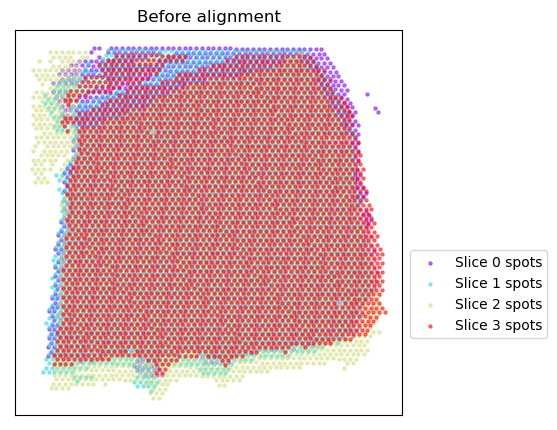

Using the Iterative Closest Point algorithm for alignemnt.
Detecting edges...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Aligning edges...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


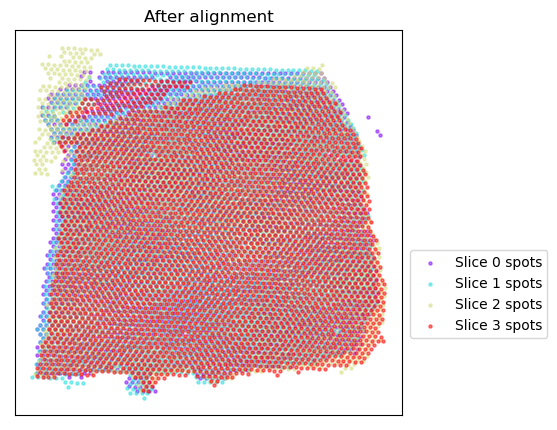

In [9]:
# Align four ST slices
adata_st_list_raw = [adata_st1, adata_st2, adata_st3, adata_st4]
adata_st_list = STitch3D.utils.align_spots(adata_st_list_raw, plot=True)

In [10]:
celltype_list_use = ['Astros_1', 'Astros_2', 'Astros_3', 'Endo', 'Micro/Macro',
                     'Oligos_1', 'Oligos_2', 'Oligos_3',
                     'Ex_1_L5_6', 'Ex_2_L5', 'Ex_3_L4_5', 'Ex_4_L_6', 'Ex_5_L5',
                     'Ex_6_L4_6', 'Ex_7_L4_6', 'Ex_8_L5_6', 'Ex_9_L5_6', 'Ex_10_L2_4']

adata_st, adata_basis = STitch3D.utils.preprocess(adata_st_list,adata_ref,
                                                celltype_ref = celltype_list_use,
                                                sample_col = "group",
                                                slice_dist_micron = [10., 300., 10.],
                                                n_hvg_group = 500,
                                                save_path = SAVE_PATH)   

Finding highly variable genes...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical
... storing 'condition' as categorical
... storing 'celltype' as categorical


4558 highly variable genes selected.
Calculate basis for deconvolution...


Trying to set attribute `.obs` of view, copying.


1 batches are used for computing the basis vector of cell type <Astros_1>.
17 batches are used for computing the basis vector of cell type <Astros_2>.
14 batches are used for computing the basis vector of cell type <Astros_3>.
17 batches are used for computing the basis vector of cell type <Endo>.
17 batches are used for computing the basis vector of cell type <Ex_10_L2_4>.
15 batches are used for computing the basis vector of cell type <Ex_1_L5_6>.
15 batches are used for computing the basis vector of cell type <Ex_2_L5>.
17 batches are used for computing the basis vector of cell type <Ex_3_L4_5>.
14 batches are used for computing the basis vector of cell type <Ex_4_L_6>.
17 batches are used for computing the basis vector of cell type <Ex_5_L5>.
16 batches are used for computing the basis vector of cell type <Ex_6_L4_6>.
16 batches are used for computing the basis vector of cell type <Ex_7_L4_6>.
15 batches are used for computing the basis vector of cell type <Ex_8_L5_6>.
13 batches a

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Start building a graph...
Radius for graph connection is 150.7000.
9.8415 neighbors per cell on average.


In [11]:
adata_st

AnnData object with n_obs × n_vars = 14243 × 4558
    obs: 'in_tissue', 'array_row', 'array_col', 'barcode', 'slice_id', 'layer', 'slice', 'batch', 'library_size'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p'
    obsm: 'spatial', 'spatial_aligned', 'count', 'graph', '3D_coor'

In [13]:
# Run STitch3D
model = STitch3D.model.Model(adata_st, adata_basis)
model.train()

  0%|          | 2/20000 [00:01<2:48:48,  1.97it/s]

Step: 0, Loss: 2438.9314, d_loss: 2433.3323, f_loss: 55.9906


 10%|█         | 2002/20000 [06:02<53:54,  5.56it/s] 

Step: 2000, Loss: 745.7781, d_loss: 742.4756, f_loss: 33.0255


 20%|██        | 4002/20000 [12:04<48:13,  5.53it/s]

Step: 4000, Loss: 706.0618, d_loss: 702.7811, f_loss: 32.8061


 30%|███       | 6002/20000 [18:05<42:03,  5.55it/s]

Step: 6000, Loss: 696.4056, d_loss: 693.1412, f_loss: 32.6439


 40%|████      | 8002/20000 [24:07<36:02,  5.55it/s]

Step: 8000, Loss: 693.6951, d_loss: 690.4426, f_loss: 32.5243


 50%|█████     | 10002/20000 [30:08<29:58,  5.56it/s]

Step: 10000, Loss: 693.0974, d_loss: 689.8430, f_loss: 32.5442


 60%|██████    | 12002/20000 [36:10<23:59,  5.56it/s]

Step: 12000, Loss: 691.7047, d_loss: 688.4637, f_loss: 32.4097


 70%|███████   | 14002/20000 [42:11<18:11,  5.50it/s]

Step: 14000, Loss: 692.3254, d_loss: 689.0718, f_loss: 32.5355


 80%|████████  | 16002/20000 [48:13<12:00,  5.55it/s]

Step: 16000, Loss: 690.6113, d_loss: 687.3817, f_loss: 32.2960


 90%|█████████ | 18002/20000 [54:14<05:58,  5.58it/s]

Step: 18000, Loss: 689.8818, d_loss: 686.6545, f_loss: 32.2729


100%|██████████| 20000/20000 [1:00:15<00:00,  5.53it/s]


In [14]:
result = model.eval(adata_st_list_raw, save = True, output_path = SAVE_PATH)

... storing 'layer' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'layer' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'layer' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'layer' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
